In [1]:
import cyecca.lie as lie
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def derive():
    x0 = ca.SX.sym("x", 4)
    w = ca.SX.sym("w", 3)

    X = lie.SO3Mrp.element(x0)

    # gyro prediction
    W = lie.so3.element(w)
    dt = ca.SX.sym("dt")

    # this is a geodetic (assuming contant gyro), so euler prediction is exact
    # this is equivalent to:
    # X = X*(W*dt).exp(lie.SO3Mrp)
    X += W * dt

    # shadow Mrp if necessary
    X = lie.SO3Mrp.shadow_if_necessary(X)

    f_predict = ca.Function(
        "predict", [w, x0, dt], [X.param], ["w", "x0", "dt"], ["x1"]
    )

    return {"f_predict": f_predict}


eqs = derive()

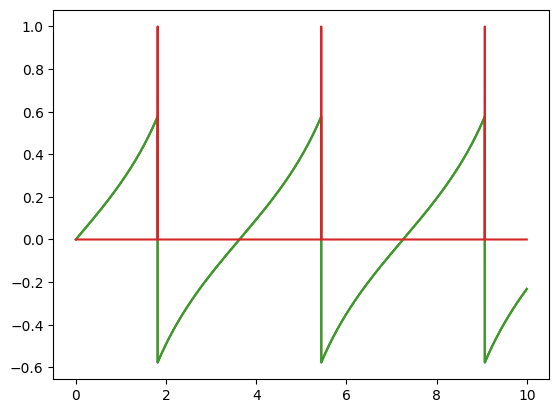

In [18]:
def simulate(t0=0, tf=10, dt=0.001):
    t = t0
    x = np.array([0, 0, 0, 0])
    omega = np.array([1, 1, 1])
    hist = {
        "x": [],
        "t": [],
    }

    t_vect = np.arange(start=t0, stop=tf, step=dt)

    for t in t_vect:
        x = eqs["f_predict"](omega, x, dt)
        hist["x"].append(np.array(x).reshape(-1))
        hist["t"].append(t)
        t += dt

    for k in hist.keys():
        hist[k] = np.array(hist[k])

    plt.plot(hist["t"], hist["x"])


simulate()